# Mathematik für Biologiestudierende II

Sommersemester 2025

03.06.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

## Vorlesungsevaluation

* Bitte füllen Sie den Evaluationsbogen aus
* Bitte stecken Sie den ausgefüllten Bogen in den Briefumschlag, der durch die Reihen geht

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()

# Themen

* Korrelation
* Empirischer Korrelationskoeffizient
* Regression zum Mittelwert
* Beispiel Bleibelastung

# Korrelation

* Eine Korrelation zwischen zwei Datensätzen ist eine gemeinsame oder gegenläufige Tendenz.
* Beispielsweise steigt der Blutdruck tendenziell mit dem Alter.
* Gemessen wird die Korrelation durch den empirischen Korrelationskoeffizienten.
* Der empirischen Korrelationskoeffizient beantwortet die Frage
 
>      Gibt es eine Korrelation?

### Beispiel für zwei unkorrelierte Größen

* formal ist es auch möglich, Regressionsplot für zwei unkorrelierte Größen auszurechnen

In [2]:
df = pd.DataFrame()
df['Zufall1'] = stats.norm.rvs(size=30)
df['Zufall2'] = stats.norm.rvs(size=30)
df.head()

,Zufall1,Zufall2
0,0.505742,-1.502576
1,1.089853,-0.093230
2,0.742122,-0.841239
3,0.559189,-0.379652
4,1.406075,-0.207520


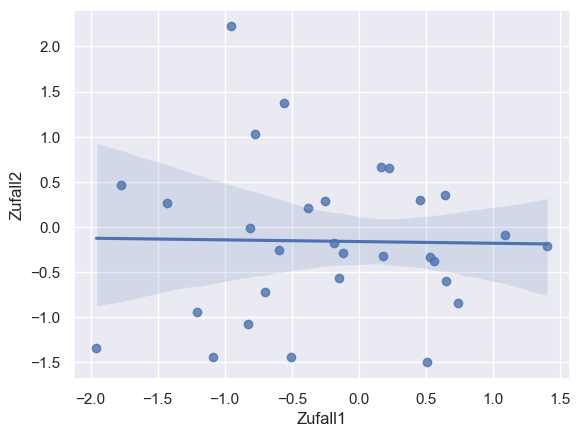

In [3]:
sns.regplot(df, x='Zufall1', y='Zufall2');

# Empirischer Korrelationskoeffizient

* Kennzahl zur Überprüfung gemeinsamer Tendenz
* $s_x$ sei die Stichprobenstreuung der $x_j$ und $s_y$ die Stichprobenstreuung der $y_j$ 
* dann ist der *empirische Korrelationskoeffizient* gleich
$$      r = \frac{\text{covar}_{\text{emp}}(x,y)}{s_x \cdot s_y} $$

* Der Korrelationskoeffizient ist dimensionslos

### Beispiel "Zufall"

In [4]:
df.cov()

,Zufall1,Zufall2
Zufall1,0.698120,-0.013018
Zufall2,-0.013018,0.737468


In [5]:
sx = df.Zufall1.std()
sx

0.835536022855466

In [6]:
sy = df.Zufall2.std()
sy

0.8587593030657297

In [7]:
covar = df.Zufall1.cov(df.Zufall2)
covar

-0.013017976048013774

In [8]:
r = covar / (sx*sy)
r

-0.01814290534162877

## Interpretation des empirischen Korrelationskoeffizienten

Der Korrelationskoeffizient zeigt an, ob zwei Datensätze eine gemeinsame Tendenz aufweisen

* wenn er nahe bei $1$ liegt, dann wachsen $x$ und $y$ gemeinsam (gemeinsame Tendenz)
* wenn er nahe bei $-1$ liegt, dann fällt $y$, wenn $x$ wächst (gegenläufige Tendenz)
* wenn er nahe bei $0$ liegt, dann gibt es kein gemeinsames Verhalten

* auch ein negativer Korrelationskoeffizient hat eine Bedeutung
* Beispiel:  Je weniger Pestizide ich im Garten ausbringe, desto mehr Bienen habe ich

## Berechnung mit `pandas`

In [9]:
df.corr()

,Zufall1,Zufall2
Zufall1,1.000000,-0.018143
Zufall2,-0.018143,1.000000


### Beispiel: Blutdruckdaten 
    
Wir hatten in der letzten Woche die Kovarianzen für die Blutdruckdaten bestimmt  

In [10]:
df = pd.read_csv('blutdruckdaten.csv')
df.cov()

,Alter,Blutdruck,Größe
Alter,231.131034,348.572414,36.128966
Blutdruck,348.572414,750.271264,69.805057
Größe,36.128966,69.805057,28.617195


Jetzt bestimmen wir die Korrelationskoeffizienten

In [11]:
df.corr()

,Alter,Blutdruck,Größe
Alter,1.000000,0.837056,0.444235
Blutdruck,0.837056,1.000000,0.476392
Größe,0.444235,0.476392,1.000000


* Alter und Blutdruck sind korreliert (aber nicht stark)
* die anderen Größen sind nicht korreliert

## Beispielgraph mit sehr guter Korrelation

In [12]:
df1 = pd.DataFrame()
P = stats.norm(0.005, 0.005)    # ganz kleine Störung
df1['Länge'] = np.arange(30)
df1['Breite'] = 5 - 0.002*df1.Länge + P.rvs(size=30)
df1.head()

,Länge,Breite
0,0,5.011937
1,1,5.005393
2,2,5.001882
3,3,4.999195
4,4,5.005367


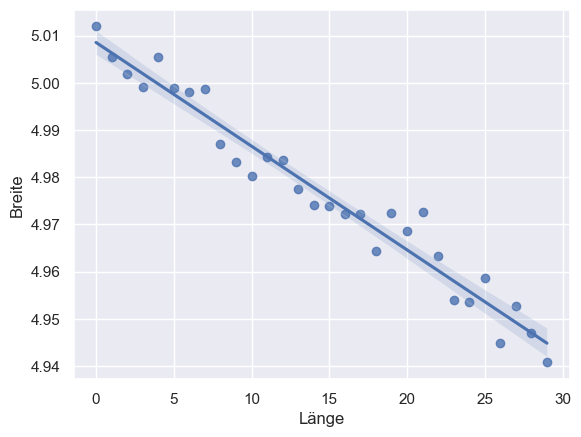

In [13]:
sns.regplot(df1, x='Länge', y='Breite');

In [14]:
df1.corr()

,Länge,Breite
Länge,1.000000,-0.977345
Breite,-0.977345,1.000000


Das darf man nicht verwechseln mit der Steigung der Regressionsgeraden

In [15]:
m = df1.Länge.cov(df1.Breite) / df1.Länge.var()
m

-0.002197168909885257

# Regression zum Mittelwert

* Der Begriff *Regression* kommt von Francis Galton, einem Neffen von Charles Darwin
* Er hatte den auf der nächsten Folie gezeigten Datensatz analysiert
* Auf der $x$-Achse stehen die Größen der Väter in Zoll
* Auf der $y$-Achse stehen die Größen der Söhne in Zoll

In [16]:
df = pd.read_csv('galton.csv')
df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,002,75.5,66.5,73.66,4,1,male,73.5
2,002,75.5,66.5,73.66,4,2,male,72.5
3,003,75.0,64.0,72.06,2,1,male,71.0
4,004,75.0,64.0,72.06,5,1,male,70.5


* Aufbereitung eines Datensatzes von Galton.  Die Aufbereitung stammt aus den Begleitdaten zum Buch "Linear Models with Python" von Faraway

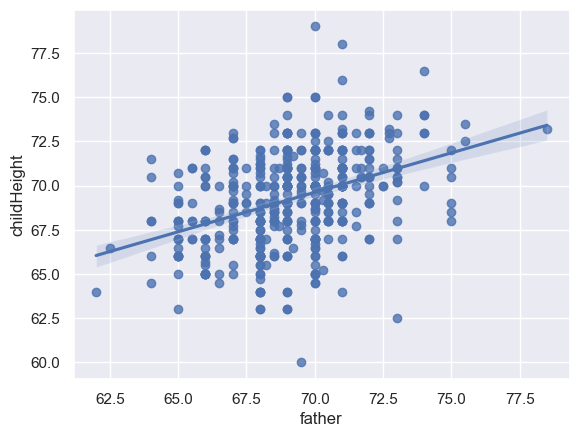

In [17]:
sns.regplot(df, x='father', y='childHeight');

Die Steigung dieser Geraden ist positiv, aber deutlich kleiner als 1

In [18]:
m = df.father.cov(df.childHeight) / df.father.var()
m

0.44652260468787525

## Regression zum Mittelwert:  Interpretation

* Die Söhne ungewöhnlich großer oder kleiner Väter sind im Mittel selbst zwar auch größer bzw. kleiner als der Mittelwert, aber diese Differenz ist kleiner als bei den Vätern
* Galton bezeichnet dies (ziemlich unfreundlich) als "Regression to mediocrity"
* Das gilt aber nur für die Individuen, nicht für die Population als Ganzes
* auch in der nächsten Generation gibt es wieder ungewöhnlich große Individuen, aber in anderen Familien

# Korrelation &ne; Kausalität

* Wenn der Korrelationskoeffizient von $x$ und $y$ nahe $0$ liegt, dann gibt es keinen kausalen Zusammenhang     zwischen ihnen (seltene nichtlineare Pänomene mal ausgenommen)
* Man kann aber im umgekehrten Fall von einem Korrelationskoeffizienten nahe bei $1$ nicht auf einen kausalen     Zusammenhang schließen

* Zum Beispiel nimmt seit Jahrzehnten in Deutschland sowohl die Zahl der Geburten als auch die Zahl der Störche ab
* Der kausale Zusammenhang ist aber umstritten

* Beispiel aus der Schlafforschung:  Mittagsschlafdauern über 90 Minuten sind ungesund 

* Bei Menschen korreliert die Rechtschreibfähigkeit mit der Schuhgröße

* zumindest bei Menschen unter zehn Jahren

<img src="https://imgs.xkcd.com/comics/correlation.png" alt="xkcd Cartoon 552" width="85%"/>

Quelle: http://xkcd.com/552

## Beispiel: Bleibelastung im Gewebe von Ratten

* kontaminiertes Gelände: fange 10 Ratten
* unbelastetes Vergleichsgelände:  fange 10 Ratten
* für jede Ratte wird ihr Alter in Monaten und der Bleigehalt im Gewebe bestimmt

In [19]:
df = pd.read_csv('ratten.csv')
df.head()

,Alter,Belastung,Gelände
0,10,63,unkontaminiert
1,12,67,unkontaminiert
2,6,55,unkontaminiert
3,6,42,unkontaminiert
4,11,73,unkontaminiert


In [20]:
df_b = df[df.Gelände=='kontaminiert']
df_u = df[df.Gelände=='unkontaminiert']

In [21]:
df_b.describe()

,Alter,Belastung
count,10.000000,10.000000
mean,7.700000,66.500000
std,2.451757,10.384283
min,4.000000,50.000000
25%,6.250000,61.000000
50%,8.000000,66.000000
75%,9.750000,75.250000
max,11.000000,81.000000


In [22]:
df_u.describe()

,Alter,Belastung
count,10.000000,10.000000
mean,9.700000,62.500000
std,2.451757,11.017663
min,6.000000,42.000000
25%,8.250000,55.750000
50%,10.000000,65.000000
75%,11.750000,72.000000
max,13.000000,75.000000


* Es gibt einen Unterschied in der Bleibelastung; aber auch eine große Stichprobenstreuung.

In [23]:
stats.ttest_ind(df_u.Belastung, df_b.Belastung, alternative='less')

TtestResult(statistic=-0.8354714854531734, pvalue=0.20720251637482168, df=18.0)

* Der Unterschied ist nicht signifikant.
* Es fällt aber auf, dass die Ratten von dem belasteten Gebiet im Mittel jünger als die anderen sind.
* Wir wollen das Alter herausrechnen

* Steigt die Bleibelastung mit dem Alter?

In [24]:
df_b.corr(numeric_only=True)   #  ohne die Option gibt es einen ValueError

,Alter,Belastung
Alter,1.000000,0.796465
Belastung,0.796465,1.000000


In [25]:
df_u.corr(numeric_only=True)

,Alter,Belastung
Alter,1.00000,0.82883
Belastung,0.82883,1.00000


Wir zeigen beide Regressionen in einem Bild

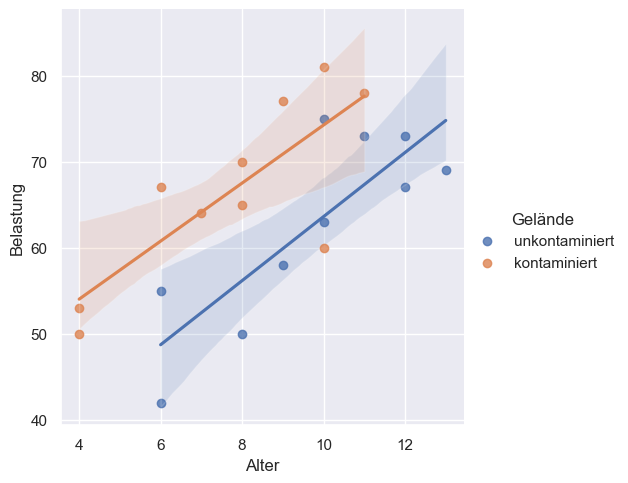

In [26]:
sns.lmplot(df, x='Alter', y='Belastung', hue='Gelände');

* Die Gerade zu den Daten des kontaminierten Geländes liegt klar oberhalb der Geraden des unkontaminierten Geländes

* `sns.lmplot` vereint mehrere regplots, ähnlich wie das `sns.displot` tut
* es hat auch ähnliche Optionen

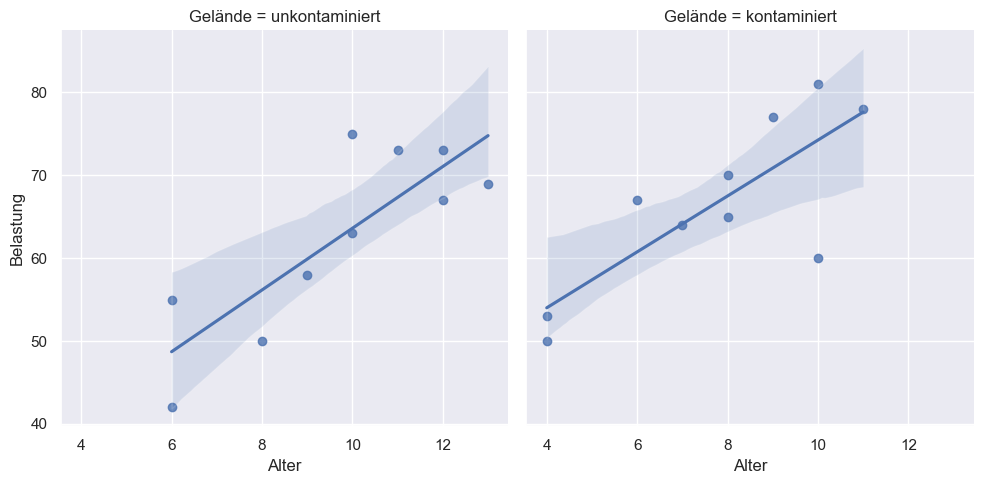

In [27]:
sns.lmplot(df, x='Alter', y='Belastung', col='Gelände');